# K-Means compressed pictures

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin    # calculate2 points distance function
from sklearn.datasets import load_sample_image         # load image in
from sklearn.utils import shuffle                      #shuffle, mix things order

china = load_sample_image("china.jpg")
#print(china)
print(china.dtype)
print(china.shape)

uint8
(427, 640, 3)


In [36]:
type(china)

numpy.ndarray

In [37]:
#china

In [32]:
china[0]

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.98039216, 0.98431373, 1.        ],
       [0.98039216, 0.98431373, 1.        ],
       [0.98039216, 0.98431373, 1.        ]])

In [3]:
china[0][0]       #[174,201,231] 3 features decide a color

array([174, 201, 231], dtype=uint8)

In [4]:
newimage = china.reshape((427 * 640,3))
print(newimage.shape)       # 273280 rows, 3 features

(273280, 3)


In [6]:
# drop duplicate color get the unique colors
print(pd.DataFrame(newimage).drop_duplicates().shape)      # it has 96615 colors in the picture

(96615, 3)


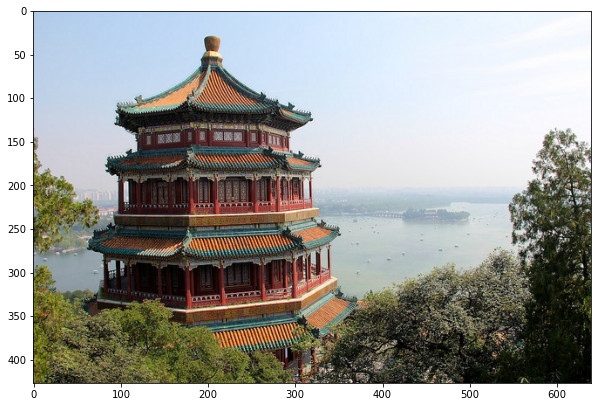

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(china)            # three-dimensional to create a picture
plt.show()

# K-Means
    Try to reduce colors from 96615 to 64

### Normalization

In [12]:
n_clusters = 64

#plt.imshow在浮点数上表现非常优异，在这里我们把china中的数据，转换为浮点数，压缩到[0,1]之间
china = np.array(china, dtype=np.float64) / china.max()
print((china<0).sum())
print((china>1).sum())

0
0


In [13]:
# china image change to array     #now is 3 dimension array, we need to change to 2 dimension array
w, h, d = original_shape = tuple(china.shape)
print(w)
print(h)
print(d)           # d have to be 3, we can change the feature, we just can change the w & h

427
640
3


In [15]:
assert d == 3        #  d have to be 3, if not will show error     # 1 color is decided by 3 points
#assert ≈ raise error if not，that means if not True it will show error
# eg.
# d_ = 5
#assert d_ == 3     # here d ≠ 3， so will show error

In [16]:
image_array = np.reshape(china, (w * h, d))   #reshape 
print(image_array)
print(image_array.shape)         #（427*640,3）

[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]
(273280, 3)


No matter how many dimension, after multiply the amount didn't change, dimension can change anytime



### Look for 64 centorid using K-means

In [ ]:
#firstly, look for centroid using 1000 data
n_clusters = 64
image_array_sample = shuffle(image_array, random_state=0)[:1000] 
                                        #because data are big, we just use part of it to look for the centroid 
                                        # after that use K-Means to predict 
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)  
print(kmeans.cluster_centers_.shape)        # get 64 centroid

In [20]:
# use 64 centroid to predict 273280 data 
labels = kmeans.predict(image_array)
print(labels.shape)
print(set(labels))      #drop duplicate to see how many classification it has 
print(len(set(labels)))     # 64 cnetroid

(273280,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63}
64


In [21]:
# use centroids to replace 273280 data
image_kmeans = image_array.copy()

print(image_kmeans)      #273280 points,96615 colors （Pixels)
print(labels)            #273280 points's centroid indexx

print(kmeans.cluster_centers_[labels[0]])       # the centorid point fo label【0】

[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]
[62 62 62 ...  1  6  6]
[0.73524384 0.82021116 0.91925591]


In [22]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

# check the new picture
print(image_kmeans.shape)
print(pd.DataFrame(image_kmeans).drop_duplicates().shape)

(273280, 3)
(64, 3)


In [23]:
# recover the Picture structure
image_kmeans = image_kmeans.reshape(w,h,d)
print(image_kmeans.shape)

(427, 640, 3)


### Look for 64 centroids using Random

In [25]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters] #just get random 64 point as centroid
print(centroid_random.shape)


(64, 3)


In [26]:
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)

print(labels_random)
print(labels_random.shape)
print(len(set(labels_random))) 


[55 55 55 ... 52 60 60]
(273280,)
64


In [28]:
# use contriod to replace all the points
image_random = image_array.copy()

for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

#recover the picture structure
image_random = image_random.reshape(w,h,d)
print(image_random.shape)


(427, 640, 3)


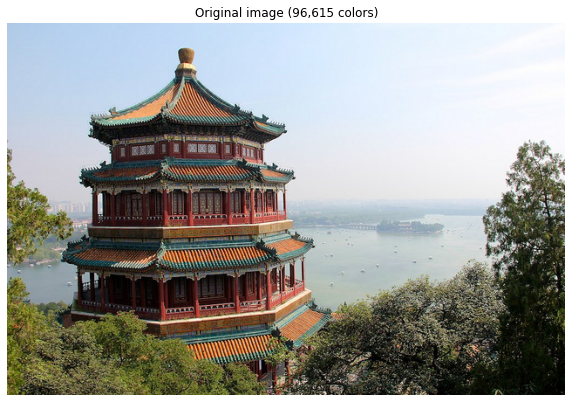

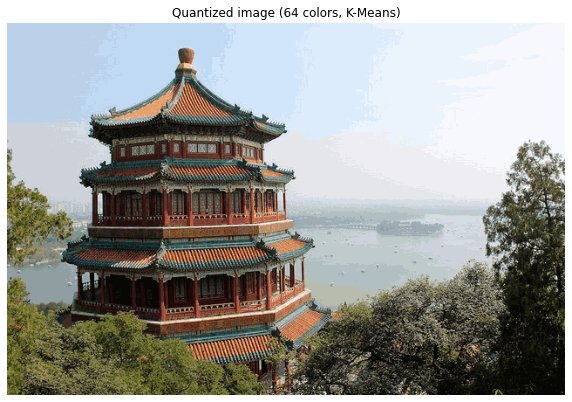

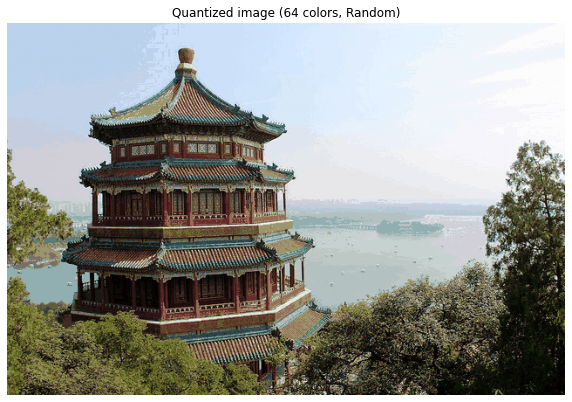

In [29]:
plt.figure(figsize=(10,10))
plt.axis('off')         #不显示坐标轴
plt.title('Original image (96,615 colors)')     #原图
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')   #聚类得出的图片
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')    #随机分录聚类得出的图片
plt.imshow(image_random)
plt.show()

The picture compressed from 96615 colors to 64 colors. And it use k-means to compressed picture geta better quality than random.